## Capstone Project: Data Cleaning Phase

**Assignment: Create a short document (1-2 pages) in your github describing the data wrangling steps that you undertook to clean your capstone project data set. What kind of cleaning steps did you perform? How did you deal with missing values, if any? Were there outliers, and how did you decide to handle them? This document will eventually become part of your milestone report.**  
  
**In this notebook, raw data from the Copper Mountain, CO SNOTEL site and Copper Mountain, CO ASOS station will be wrangled for further use**

**Import necessary modules**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dtb
import os
from glob import glob
import datetime as dt


**Step 1: Import in the yearly snotel files **

In [3]:

snotel_files = glob(r'C:\Users\RAPP\Documents\Capstone\data\SNOTEL\415_STAND_YEAR=*.csv')
print(snotel_files)



['C:\\Users\\RAPP\\Documents\\Capstone\\data\\SNOTEL\\415_STAND_YEAR=2005.csv', 'C:\\Users\\RAPP\\Documents\\Capstone\\data\\SNOTEL\\415_STAND_YEAR=2006.csv', 'C:\\Users\\RAPP\\Documents\\Capstone\\data\\SNOTEL\\415_STAND_YEAR=2007.csv', 'C:\\Users\\RAPP\\Documents\\Capstone\\data\\SNOTEL\\415_STAND_YEAR=2008.csv', 'C:\\Users\\RAPP\\Documents\\Capstone\\data\\SNOTEL\\415_STAND_YEAR=2009.csv', 'C:\\Users\\RAPP\\Documents\\Capstone\\data\\SNOTEL\\415_STAND_YEAR=2010.csv', 'C:\\Users\\RAPP\\Documents\\Capstone\\data\\SNOTEL\\415_STAND_YEAR=2011.csv', 'C:\\Users\\RAPP\\Documents\\Capstone\\data\\SNOTEL\\415_STAND_YEAR=2012.csv', 'C:\\Users\\RAPP\\Documents\\Capstone\\data\\SNOTEL\\415_STAND_YEAR=2013.csv', 'C:\\Users\\RAPP\\Documents\\Capstone\\data\\SNOTEL\\415_STAND_YEAR=2014.csv', 'C:\\Users\\RAPP\\Documents\\Capstone\\data\\SNOTEL\\415_STAND_YEAR=2015.csv', 'C:\\Users\\RAPP\\Documents\\Capstone\\data\\SNOTEL\\415_STAND_YEAR=2016.csv', 'C:\\Users\\RAPP\\Documents\\Capstone\\data\\SNOTEL

** Step 2: read in the csv files**

In [4]:
data = [pd.read_csv(f, header=1) for f in snotel_files]
data_df = pd.concat(data)
print(data_df.head())

   Site Id        Date   Time  WTEQ.I-1 (in)   PREC.I-1 (in)   \
0      415  2005-01-01  00:00             5.2             5.8   
1      415  2005-01-01  03:00             5.2             6.0   
2      415  2005-01-02  00:00             5.1             5.8   
3      415  2005-01-02  03:00             5.1             5.8   
4      415  2005-01-03  00:00             5.1             5.9   

   TOBS.I-1 (degC)   SNWD.I-1 (in)   Unnamed: 7  
0              -2.1           -99.9         NaN  
1              -4.2           -99.9         NaN  
2             -11.2           -99.9         NaN  
3             -11.9           -99.9         NaN  
4              -8.9           -99.9         NaN  


**Step 3: Each snotel file contains hourly or 3-hourly observations of the following parameters:  **
**Site_ID:**  NRCS Site Identifier  
**Date:**  Date of observation  
**Time:** Hour of observation  
**WTEQ.I-1 (in):** Recorded Water Equivalent of snow  
**PREC.I-1 (in):** Recorded Precipitation  
**TOBS.I-1 (DegC):** Recorded Temperature  
**SNWD.I (in):** Recorded Snow Depth  


**Site 4: It looks like Date and Time are in separate columns.  Merge these together and make the index to make the dataframe easy to use**

In [6]:

snotel_data = [pd.read_csv(f, header=1, parse_dates=[['Date', 'Time']], index_col='Date_Time') for f in snotel_files]

snotel_df= pd.concat(snotel_data)
print(snotel_df.head())
print(snotel_df.describe())



                     Site Id  WTEQ.I-1 (in)   PREC.I-1 (in)   \
Date_Time                                                      
2005-01-01 00:00:00      415             5.2             5.8   
2005-01-01 03:00:00      415             5.2             6.0   
2005-01-02 00:00:00      415             5.1             5.8   
2005-01-02 03:00:00      415             5.1             5.8   
2005-01-03 00:00:00      415             5.1             5.9   

                     TOBS.I-1 (degC)   SNWD.I-1 (in)   Unnamed: 7  
Date_Time                                                          
2005-01-01 00:00:00              -2.1           -99.9         NaN  
2005-01-01 03:00:00              -4.2           -99.9         NaN  
2005-01-02 00:00:00             -11.2           -99.9         NaN  
2005-01-02 03:00:00             -11.9           -99.9         NaN  
2005-01-03 00:00:00              -8.9           -99.9         NaN  
        Site Id  WTEQ.I-1 (in)   PREC.I-1 (in)   TOBS.I-1 (degC)   \
count 

**Step 4:  The missing code is for these variable -99.  Set these to Nan values**

In [17]:
#set outliers and missing value to Nan
xx=(snotel_df[:]==-99.9)
snotel_df[xx]=np.NaN
print(snotel_df.describe())


        Site Id  WTEQ.I-1 (in)   PREC.I-1 (in)   TOBS.I-1 (degC)   \
count  104069.0    98736.000000   102990.000000     104027.000000   
mean      415.0        5.943067       15.962864          1.364769   
std         0.0        6.525494        9.618173          9.123291   
min       415.0      -12.000000       -0.300000        -33.100000   
25%       415.0        0.000000        7.200000         -5.000000   
50%       415.0        3.500000       16.300000          1.300000   
75%       415.0       11.100000       23.700000          7.700000   
max       415.0       26.200000       37.900000         25.800000   

       SNWD.I-1 (in)   Unnamed: 7  
count    91277.000000         0.0  
mean        21.234944         NaN  
std         21.391861         NaN  
min       -196.000000         NaN  
25%          0.000000         NaN  
50%         18.000000         NaN  
75%         39.000000         NaN  
max        189.000000         NaN  


**Step 5:  The dataset should have a value for every hour, so use asfreq to do this.**

In [20]:
snotel_df=snotel_df.asfreq(freq='1H', fill_value=np.NaN)
print(snotel_df.describe())

        Site Id  WTEQ.I-1 (in)   PREC.I-1 (in)   TOBS.I-1 (degC)   \
count  104045.0    98725.000000   102968.000000     104027.000000   
mean      415.0        5.943730       15.960916          1.364769   
std         0.0        6.525556        9.617842          9.123291   
min       415.0      -12.000000       -0.300000        -33.100000   
25%       415.0        0.000000        7.200000         -5.000000   
50%       415.0        3.500000       16.300000          1.300000   
75%       415.0       11.100000       23.700000          7.700000   
max       415.0       26.200000       37.900000         25.800000   

       SNWD.I-1 (in)   Unnamed: 7  
count    91266.000000         0.0  
mean        21.237504         NaN  
std         21.391880         NaN  
min       -196.000000         NaN  
25%          0.000000         NaN  
50%         18.000000         NaN  
75%         39.000000         NaN  
max        189.000000         NaN  


In [ ]:
#set outliers and missing value to Nan
xx=(snotel_df['SNWD.I-1 (in) ']<-1) | (snotel_df['SNWD.I-1 (in) ']>70) 

aa =(snotel_df['TOBS.I-1 (degC) ']<-60)| (snotel_df['TOBS.I-1 (degC) ']>50) 


snotel_df['SNWD.I-1 (in) '][xx]=np.NaN
snotel_df['TOBS.I-1 (degC) '][aa]=np.NaN


print(snotel_df['SNWD.I-1 (in) '].describe())
print(snotel_df['TOBS.I-1 (degC) '].describe())

In [ ]:
snotel_df.to_csv('snotel_df.dat',sep = '\t', float_format = '%.2f',columns=['TOBS.I-1 (degC) ', 'SNWD.I-1 (in) ', '12hr-SNOWFALL' ], na_rep = -999.0)

 Each snotel file contains hourly or 3-hourly observations with a Date, Time, Temperature, snow water equivalent, and snow depth information.  The Date and Time columns are merged together into a Date_Time column which is used as the index to the dataframe. 

**Statistics of the data frame, as well as statistics from the SNWD.I-1 and TOBS series are printed.**

In [432]:

#Look at Raw data stats
print(snotel_df.head())
print(snotel_df.keys())
print(snotel_df.info())
print(snotel_df.describe())


                     Site Id  WTEQ.I-1 (in)   PREC.I-1 (in)   \
Date_Time                                                      
2005-01-01 00:00:00      415             5.2             5.8   
2005-01-01 03:00:00      415             5.2             6.0   
2005-01-02 00:00:00      415             5.1             5.8   
2005-01-02 03:00:00      415             5.1             5.8   
2005-01-03 00:00:00      415             5.1             5.9   

                     TOBS.I-1 (degC)   SNWD.I-1 (in)   Unnamed: 7  
Date_Time                                                          
2005-01-01 00:00:00              -2.1           -99.9         NaN  
2005-01-01 03:00:00              -4.2           -99.9         NaN  
2005-01-02 00:00:00             -11.2           -99.9         NaN  
2005-01-02 03:00:00             -11.9           -99.9         NaN  
2005-01-03 00:00:00              -8.9           -99.9         NaN  
Index(['Site Id', 'WTEQ.I-1 (in) ', 'PREC.I-1 (in) ', 'TOBS.I-1 (degC) ',
 

**Outliers in the snow depth series are set to NaN values.  Snow depth values <-1 or >70 are assumed outliers.**

In [433]:
#set outliers and missing value to Nan
xx=(snotel_df['SNWD.I-1 (in) ']<-1) | (snotel_df['SNWD.I-1 (in) ']>70) 

aa =(snotel_df['TOBS.I-1 (degC) ']<-60)| (snotel_df['TOBS.I-1 (degC) ']>50) 


snotel_df['SNWD.I-1 (in) '][xx]=np.NaN
snotel_df['TOBS.I-1 (degC) '][aa]=np.NaN


print(snotel_df['SNWD.I-1 (in) '].describe())
print(snotel_df['TOBS.I-1 (degC) '].describe())


count    91057.000000
mean        21.019109
std         20.585361
min         -1.000000
25%          0.000000
50%         18.000000
75%         39.000000
max         70.000000
Name: SNWD.I-1 (in) , dtype: float64
count    104027.000000
mean          1.364769
std           9.123291
min         -33.100000
25%          -5.000000
50%           1.300000
75%           7.700000
max          25.800000
Name: TOBS.I-1 (degC) , dtype: float64


c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


**TMake sure that there are no missing hours in the snow depth series.  For example, some years only reported snow depth every three hours.  The asfreq function is used to insure this.  Any missing hours are set to NaN. New statistics are printed, as well as a plot of the snow depth series for verification**

count    91046.000000
mean        21.021648
std         20.585308
min         -1.000000
25%          0.000000
50%         18.000000
75%         39.000000
max         70.000000
Name: SNWD.I-1 (in) , dtype: float64
count    104027.000000
mean          1.364769
std           9.123291
min         -33.100000
25%          -5.000000
50%           1.300000
75%           7.700000
max          25.800000
Name: TOBS.I-1 (degC) , dtype: float64


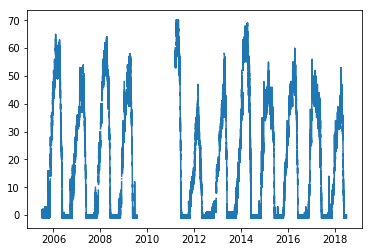

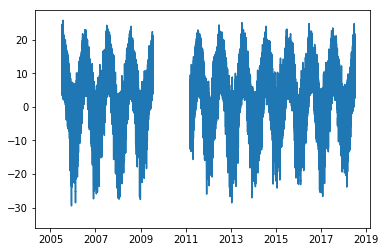

In [434]:
snotel_df=snotel_df.asfreq(freq='1H', fill_value=np.NaN)


print(snotel_df['SNWD.I-1 (in) '].describe())
print(snotel_df['TOBS.I-1 (degC) '].describe())

#plot raw data
plt.plot(snotel_df['SNWD.I-1 (in) '])
plt.show()

plt.plot(snotel_df['TOBS.I-1 (degC) '])
plt.show()


**Understanding data capture of each year is important.  The percentage of values missing for each year are printed.  Note that the high % of missing values in year 2005 is due to the the data collection not starting until late in the year.  The high number of missing values in 2010 is due to data only being reported every 3 hours that year.**

In [435]:
years = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
for year in years:
# show percent good values for each year
    print(year + ": SNWD: " + str(round(snotel_df['SNWD.I-1 (in) '][year].isnull().sum()/len(snotel_df[year])*100,2)) + "% out of " + str(len(snotel_df[year])) + \
          ", TOBS: " + str(round(snotel_df['TOBS.I-1 (degC) '][year].isnull().sum()/len(snotel_df[year])*100,2)) + "% out of " + str(len(snotel_df[year])))



2005: SNWD: 52.75% out of 8760, TOBS: 47.51% out of 8760
2006: SNWD: 19.58% out of 8760, TOBS: 0.03% out of 8760
2007: SNWD: 18.98% out of 8760, TOBS: 0.5% out of 8760
2008: SNWD: 18.93% out of 8784, TOBS: 0.0% out of 8784
2009: SNWD: 39.02% out of 8760, TOBS: 29.89% out of 8760
2010: SNWD: 72.69% out of 8760, TOBS: 66.67% out of 8760
2011: SNWD: 28.11% out of 8760, TOBS: 12.52% out of 8760
2012: SNWD: 12.45% out of 8784, TOBS: 0.01% out of 8784
2013: SNWD: 7.32% out of 8760, TOBS: 0.02% out of 8760
2014: SNWD: 12.29% out of 8760, TOBS: 0.02% out of 8760
2015: SNWD: 7.03% out of 8760, TOBS: 0.01% out of 8760
2016: SNWD: 12.59% out of 8784, TOBS: 5.57% out of 8784
2017: SNWD: 6.32% out of 8760, TOBS: 0.06% out of 8760


** **To decrease the missing data, intepolate short timeframes (<=4 hours) of missing data using the interpolate function. Due to variablity of sensor during small snow events when little snow is on pad, as well as this study being concetrated on the primary ski season,  all snow depth values for May-Septeber will be set to 0.**

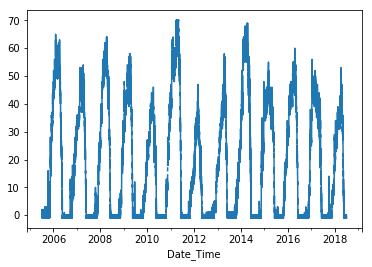

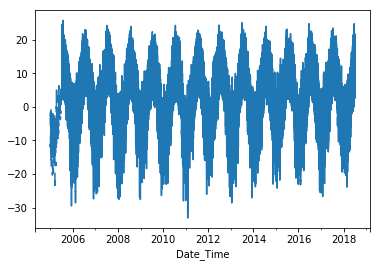

In [436]:
# interpolate missing values
snotel_df['SNWD.I-1 (in) '] = snotel_df['SNWD.I-1 (in) '].interpolate(limit=3)  #want to make this such that only interpolate when <= 34 hrs missing
snotel_df['TOBS.I-1 (degC) '] = snotel_df['TOBS.I-1 (degC) '].interpolate(limit=3)  #want to make this such that only interpolate when <= 34 hrs missing



#for year in years:
#    snotel_df['SNWD.I-1 (in) ']['05'+"-"+year] = np.NaN
#     snotel_df['SNWD.I-1 (in) ']['06'+"-"+year] = 0
#     snotel_df['SNWD.I-1 (in) ']['07'+"-"+year] = 0
#     snotel_df['SNWD.I-1 (in) ']['08'+"-"+year] = 0
#    snotel_df['SNWD.I-1 (in) ']['09'+"-"+year] = np.NaN
    
snotel_df['SNWD.I-1 (in) '].plot()
plt.show()


snotel_df['TOBS.I-1 (degC) '].plot()
plt.show()



**Now that missing data has been filled and cleaned up, calculate percentage missing by month:**

In [437]:

for j in years:
    for k in range(12):
    # show percent good values for each month
        SNWD_Missing = snotel_df['SNWD.I-1 (in) ']['%02d-%04s' % (k+1,j)].isnull().sum()
        SNWD_Possible = len(snotel_df['SNWD.I-1 (in) ']['%02d-%04s' % (k+1,j)])
        TOBS_Missing = snotel_df['SNWD.I-1 (in) ']['%02d-%04s' % (k+1,j)].isnull().sum()
        TOBS_Possible =  len(snotel_df['SNWD.I-1 (in) ']['%02d-%04s' % (k+1,j)])
        print('%02d-%04s' % (k+1,j) +  ": SNWD: " + str(round(SNWD_Missing/SNWD_Possible*100,)) + "% out of " + str(SNWD_Possible) + \
          ", : TOBS: " + str(round(TOBS_Missing/TOBS_Possible*100,3)) + "% out of " + str(TOBS_Possible))
    

01-2005: SNWD: 100.0% out of 744, : TOBS: 100.0% out of 744
02-2005: SNWD: 100.0% out of 672, : TOBS: 100.0% out of 672
03-2005: SNWD: 100.0% out of 744, : TOBS: 100.0% out of 744
04-2005: SNWD: 100.0% out of 720, : TOBS: 100.0% out of 720
05-2005: SNWD: 100.0% out of 744, : TOBS: 100.0% out of 744
06-2005: SNWD: 100.0% out of 720, : TOBS: 100.0% out of 720
07-2005: SNWD: 23.79% out of 744, : TOBS: 23.79% out of 744
08-2005: SNWD: 0.0% out of 744, : TOBS: 0.0% out of 744
09-2005: SNWD: 0.0% out of 720, : TOBS: 0.0% out of 720
10-2005: SNWD: 1.478% out of 744, : TOBS: 1.478% out of 744
11-2005: SNWD: 0.0% out of 720, : TOBS: 0.0% out of 720
12-2005: SNWD: 0.403% out of 744, : TOBS: 0.403% out of 744
01-2006: SNWD: 0.0% out of 744, : TOBS: 0.0% out of 744
02-2006: SNWD: 0.0% out of 672, : TOBS: 0.0% out of 672
03-2006: SNWD: 0.269% out of 744, : TOBS: 0.269% out of 744
04-2006: SNWD: 0.0% out of 720, : TOBS: 0.0% out of 720
05-2006: SNWD: 13.306% out of 744, : TOBS: 13.306% out of 744
06

**Now that the raw snow depth data is now cleaned up, snowfall calculations can now be made based on it.  As the snow depth data does fluctuate on an hour to hour basis due to sensor being sensitive to changes in air pressure, animals, etc, hourly snow depth values will be highly variable and potentially inaccurate, especially since at most 3 inches of snow per hour would ever occur.  Thus, such small totals would be highly susceptable to any small variations. Thus, only 12 hour snowfall will be calculated.  This will be performed by first resampling the hourly data - taking the snow depth every 12th hour and storing in a new series named 12hr_SNWD.  A plot for a single month is made to verify. **

count    9478.000000
mean       18.585944
std        20.541324
min        -1.000000
25%         0.000000
50%        11.000000
75%        37.000000
max        70.000000
Name: 12hr_SNWD, dtype: float64


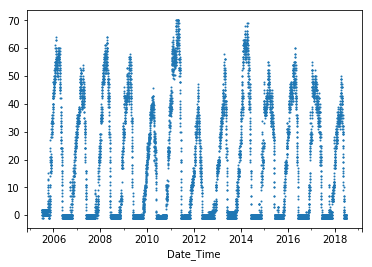

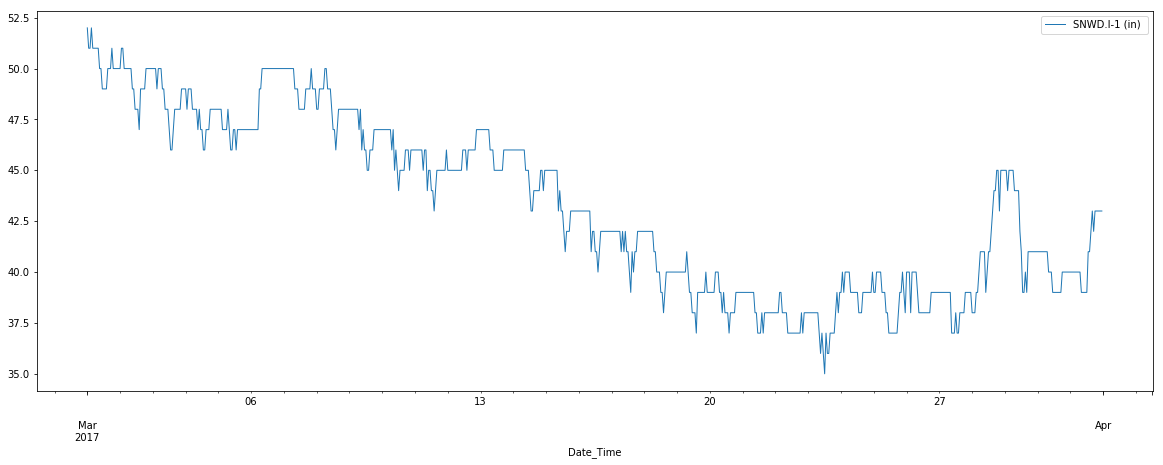

In [438]:
#Create snow depth column which contains snow depth data every 12 hours
snotel_df['12hr_SNWD'] = snotel_df['SNWD.I-1 (in) '].resample('12H').last()
# print and plot
#print(snotel_df['12hr_SNWD'])
snotel_df['12hr_SNWD'].plot(linestyle='none', marker='o', markersize=1)
print(snotel_df['12hr_SNWD'].describe())

plt.figure(figsize=(20,7))
plot1 = snotel_df['SNWD.I-1 (in) ']['03-2017'].plot(use_index=True, linewidth=1)
#plot2 = snotel_df['12hr_SNWD']['05-2017'].plot(use_index=True, secondary_y=True, marker='+')
#plt.legend(handles=[plot1, plot2])
plt.legend()
plt.show()


**Snowfall which occurs during each 12 hour interval is then calculated by subtracting the previous 12-hr resampled snow depth total for every snow depth value in the 12hr-SNOWDEPTH series.  This is performed by using the shift function. A new series named 12hr-SNOWFALL is created which contains the snowfall totals for every 12hr bin.  To verify, a single month of the 1-hr snowdepth data and the 12hr-SNOWFALL is plotted together.**

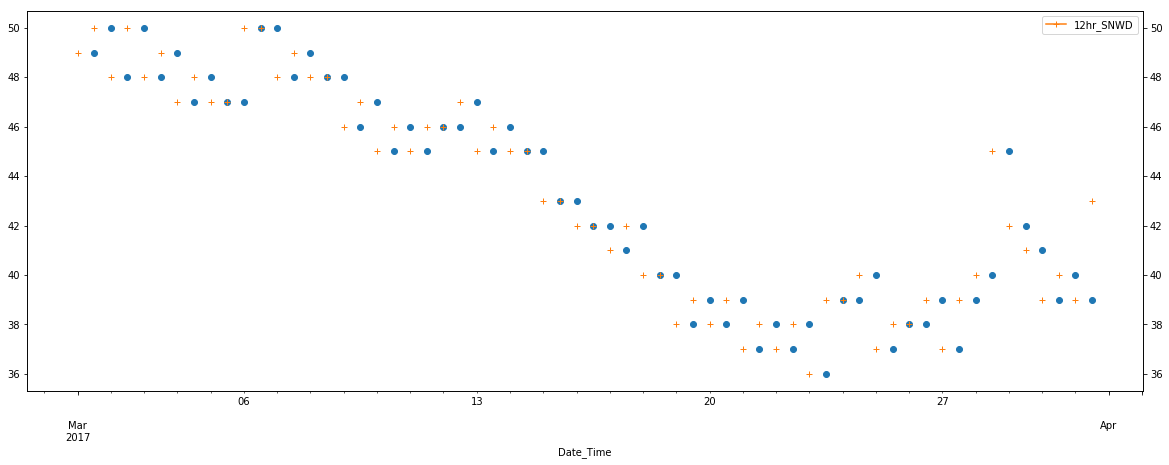

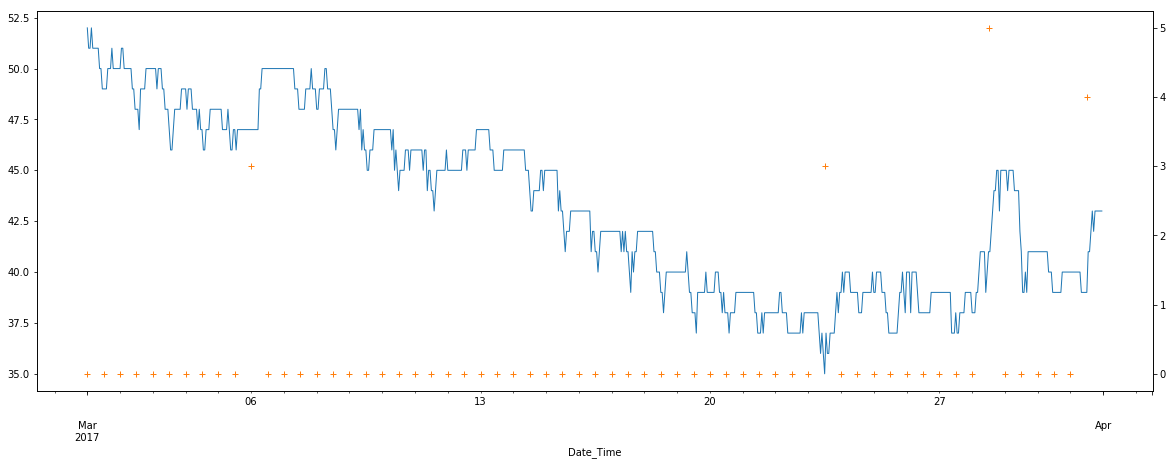

In [439]:
#Now calculate 12-snowfall column by finding difference between 12-hr snow depth observations 
snotel_df['12hr-SNOWFALL'] = snotel_df['12hr_SNWD']-snotel_df['12hr_SNWD'].shift(+12)
#only keep snowfall totals 3 or more"
zz=(snotel_df['12hr-SNOWFALL']<3)
snotel_df['12hr-SNOWFALL'][zz]=0

plt.figure(figsize=(20,7))
snotel_df['12hr_SNWD']['03-2017'].shift(+12).plot(use_index=True, marker='o')
snotel_df['12hr_SNWD']['03-2017'].plot(use_index=True, secondary_y=True, marker='+')
plt.legend()
plt.show()


plt.figure(figsize=(20,7))
plt1 = snotel_df['SNWD.I-1 (in) ']['03-2017'].plot(use_index=True, linewidth=1, label = 'SNWD')
plt2 = snotel_df['12hr-SNOWFALL']['03-2017'].plot(use_index=True, secondary_y=True, marker='+', label = '12-hr-SNOWFALL')


count    9475.000000
mean        0.203286
std         1.025618
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        18.000000
Name: 12hr-SNOWFALL, dtype: float64


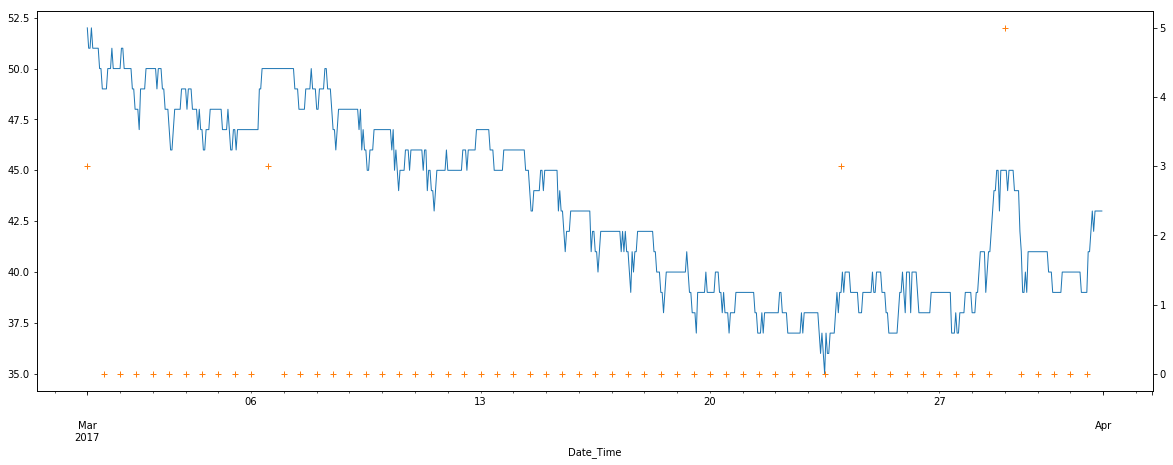

In [440]:
snotel_df['12hr-SNOWFALL'] = snotel_df['12hr-SNOWFALL'].shift(+12)

for year in years:
#    snotel_df['SNWD.I-1 (in) ']['05'+"-"+year] = np.NaN
     snotel_df['SNWD.I-1 (in) ']['06'+"-"+year] = 0
     snotel_df['SNWD.I-1 (in) ']['07'+"-"+year] = 0
     snotel_df['SNWD.I-1 (in) ']['08'+"-"+year] = 0
#    snotel_df['SNWD.I-1 (in) ']['09'+"-"+year] = np.NaN



print(snotel_df['12hr-SNOWFALL'].describe())




plt.figure(figsize=(20,7))
plt1 = snotel_df['SNWD.I-1 (in) ']['03-2017'].plot(use_index=True, linewidth=1, label = 'SNWD')
plt2 = snotel_df['12hr-SNOWFALL']['03-2017'].plot(use_index=True, secondary_y=True, marker='+', label = '12-hr-SNOWFALL')
#plt.legend(handles= [plt1,plt2], ['SNWD', '12-hr-SNOWFALL'])
#handles, labels = plt.get_legend_handles_labels()
#plt.legend(handles, labels)

#plt.legend()
plt.show()

**Plots of the SNWD.I series (1-hr snowdepth) and 12-hr SNOWFALL for each month are plotted and saved by year.  This is a check to verify there are no odd behaviours in the 12-hr SNOWFALL data series when compared to the 1-hr snowdepth series.**

In [1]:
plt.figure(figsize=(17,22))
for j in years:
    for k in range(12):
        plt.subplot(4, 3, k+1)
        plt.title('%02d-%04s' % (k+1,j))
        snotel_df['SNWD.I-1 (in) ']['%02d-%04s' % (k+1,j)].plot(use_index=True, linewidth=1)
        snotel_df['12hr-SNOWFALL']['%02d-%04s' % (k+1, j)].plot(use_index=True, secondary_y=True, marker='+')
    plt.savefig('SNWD_12hrSNOWFALL_'+ '%04s' % (j) +'.png')
    plt.show()




NameError: name 'plt' is not defined

**Now plot 1-hr SNWD data and TOBS data by year.**

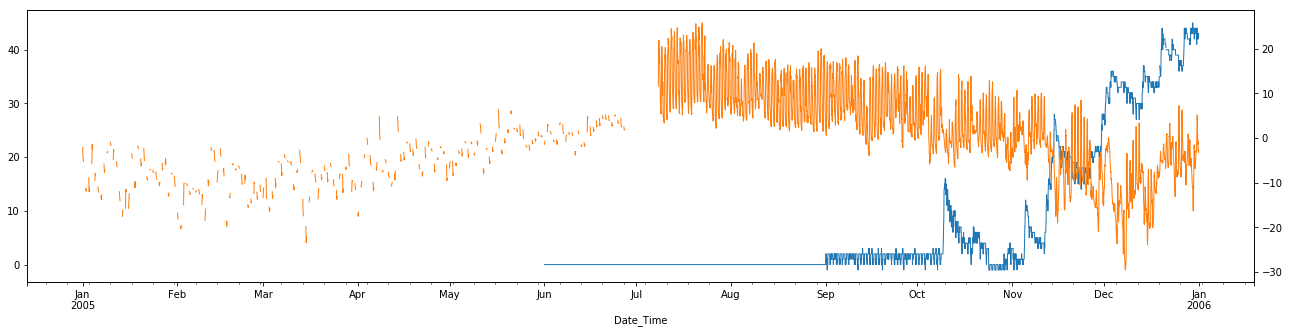

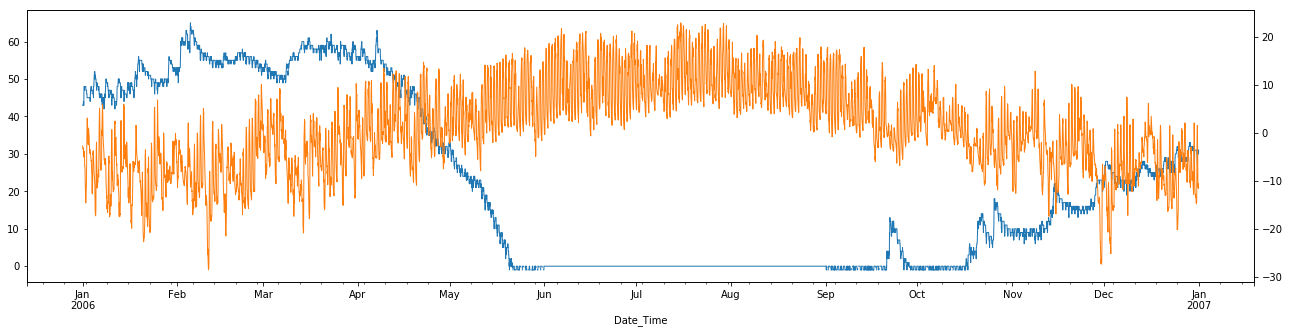

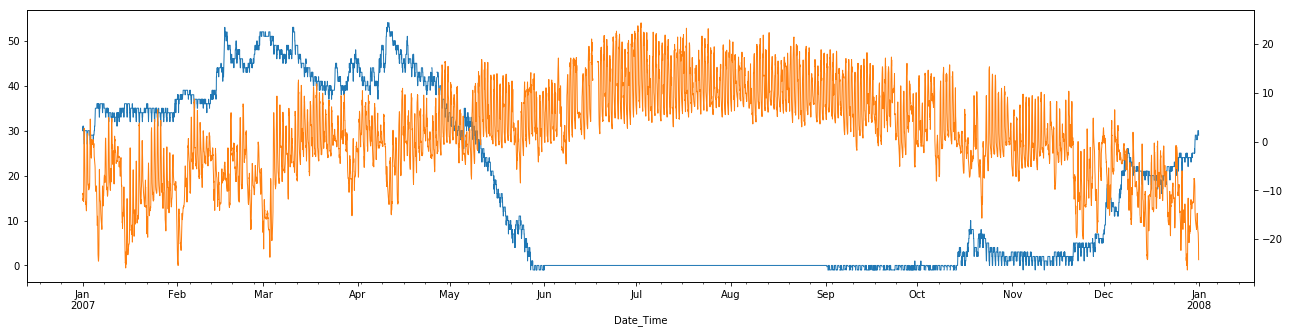

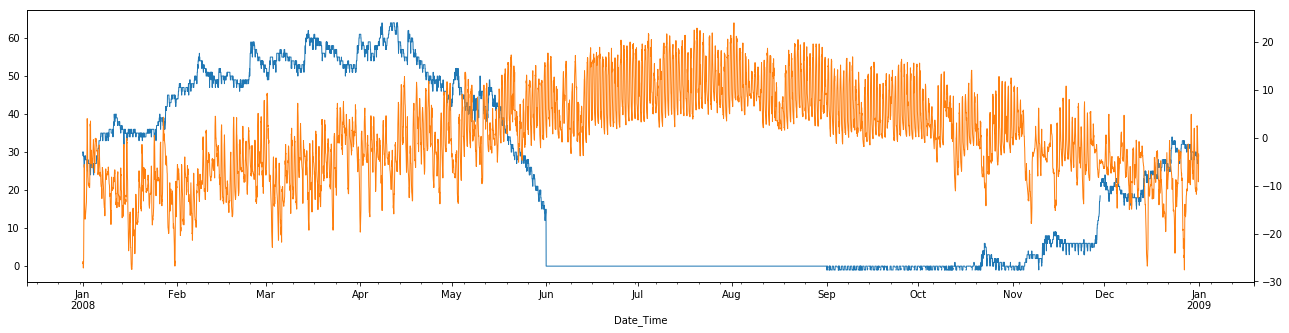

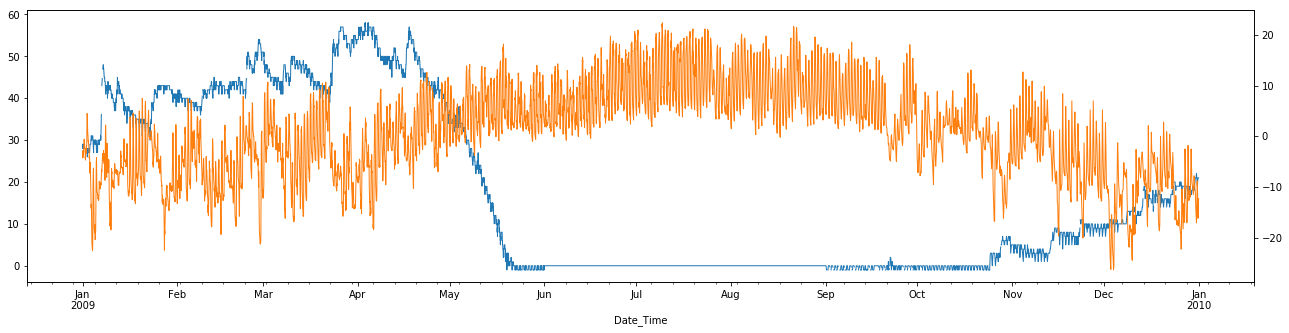

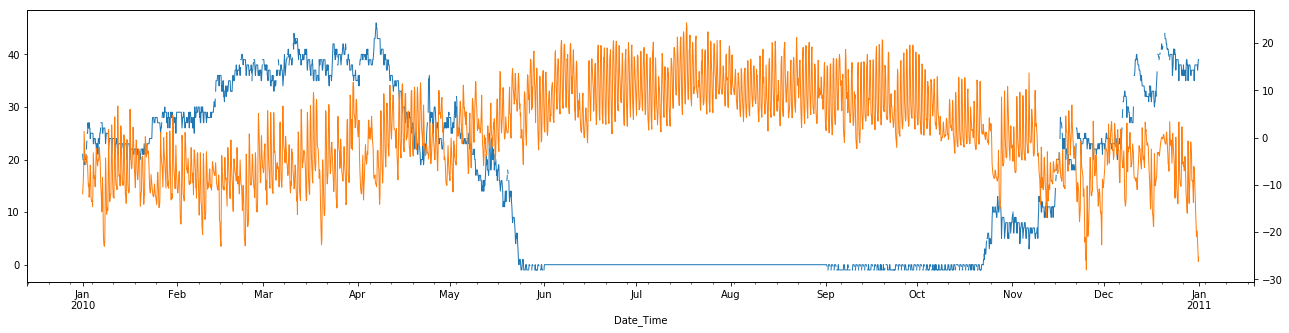

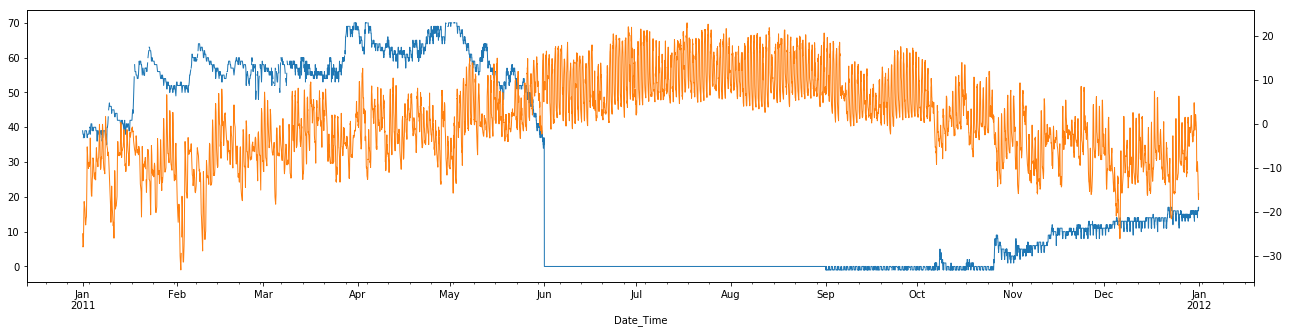

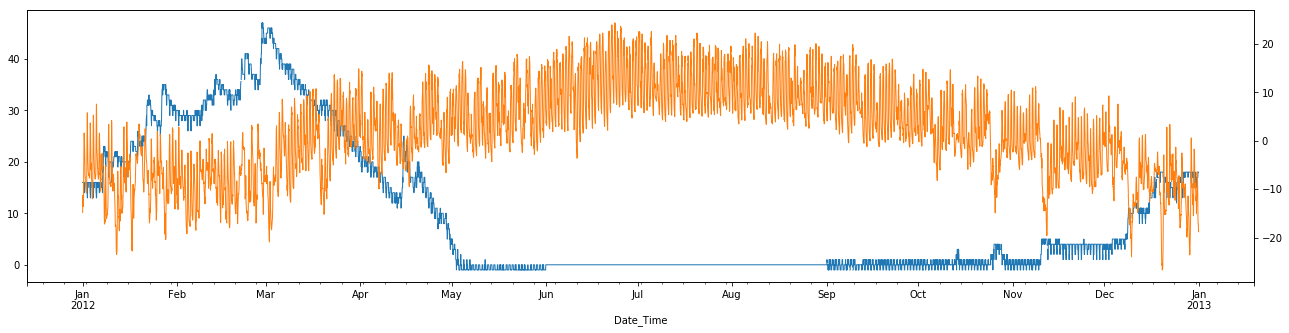

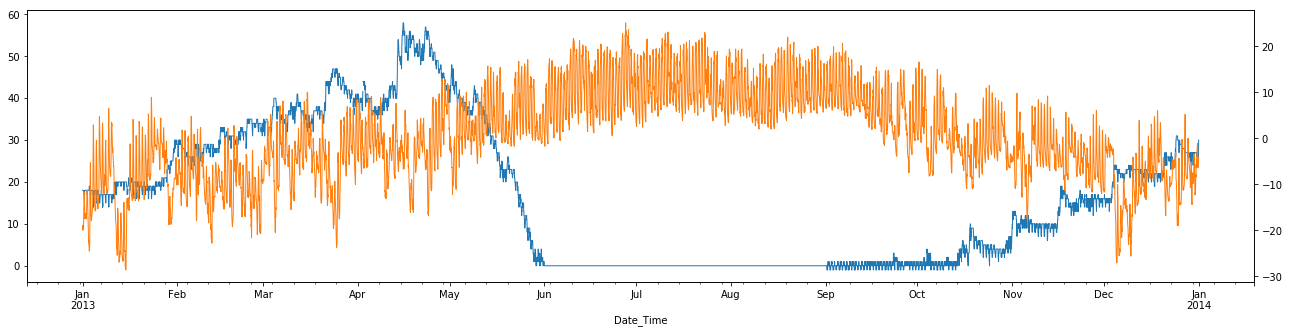

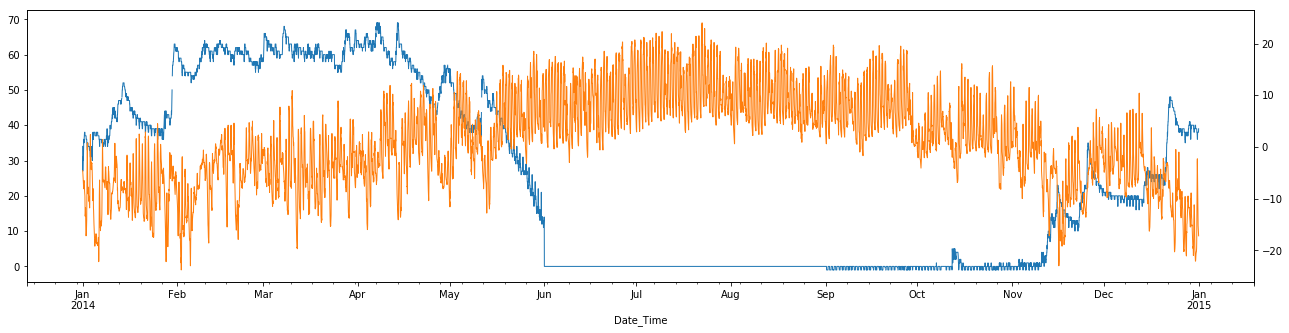

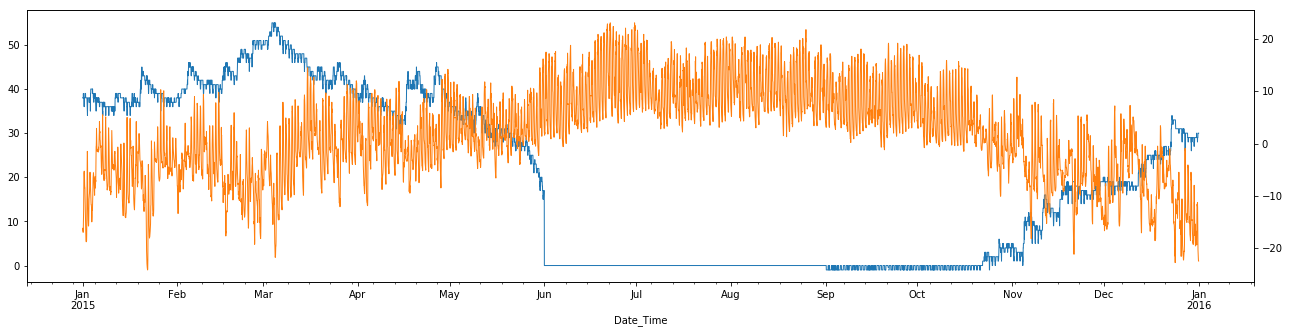

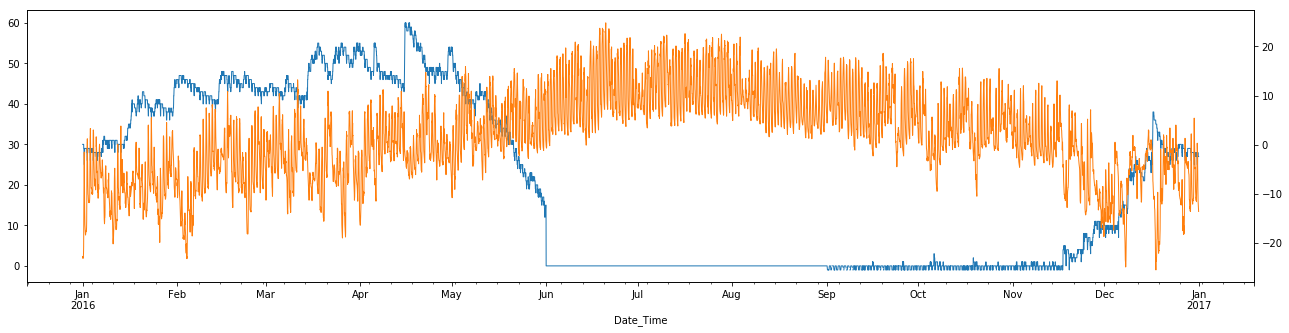

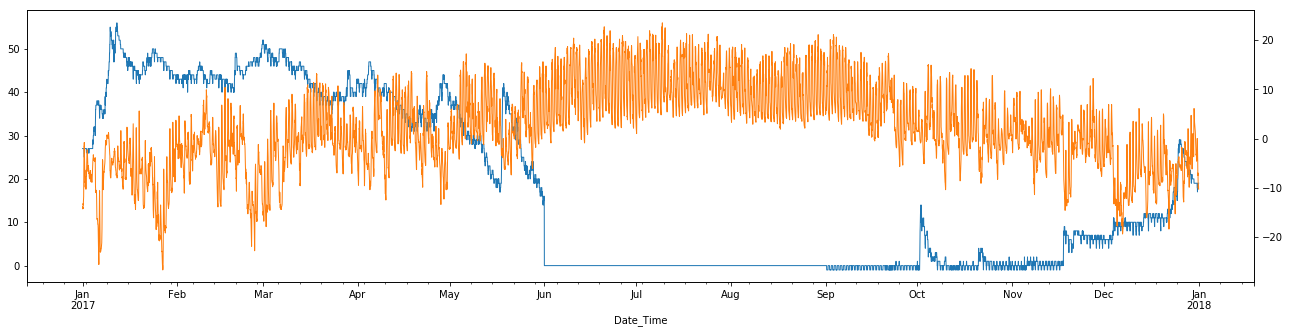

In [442]:
for j in years:
    plt.figure(figsize=(22,5))
    snotel_df['SNWD.I-1 (in) ']['%04s' % j].plot(use_index=True, linewidth=1)
    snotel_df['TOBS.I-1 (degC) ']['%04s' % j].plot(use_index=True, secondary_y = True, linewidth=1)
    plt.savefig('SNWD_TOBS_'+ '%04s' % (j) +'.png')
plt.show()

**Finally, save the TOBS, SNWD, and 12-hr SNOWFALL columns into a tab delimited file.  Missing values set to -999.0.**

In [452]:
#snotel_df.to_csv('snotel_df.dat',sep = '\t', float_format = '%.2f',columns=['TOBS.I-1 (degC) ', 'SNWD.I-1 (in) ', '12hr-SNOWFALL' ], na_rep = -999.0)